<a href="https://colab.research.google.com/github/anujshetty/SearchAndResQ/blob/main/Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import time

In [60]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython import display

from Gridworld import Gridworld
from utils import visualize_grid, policy_score, simulate_policy
from __future__ import unicode_literals
from Learning import QLearning, EpsilonGreedyExploration, FixedPolicy, ValueIterationModel


(20, 20, 4, 3, 3, 3, 6)
[4, 5, 3, 0, 0, 0]


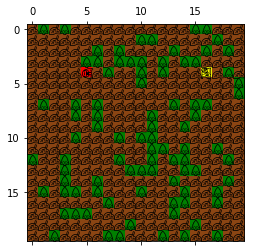

In [37]:
g_rand = Gridworld(gridworld_length=20, gridworld_width=20, num_obstacles=100,
                 collisionReward= -1, destinationReward= 5, defaultReward= 0, outOfBoundsReward = -1, 
                 failChance= 0.1, gamma= 0.95)
eps_greedy_policy =  EpsilonGreedyExploration(g_rand, 0.6, alpha=0.9)
qlearning_model = QLearning(g_rand, 0.2)
print(qlearning_model.Q.shape)
visualize_grid(g_rand)
print(g_rand.state)

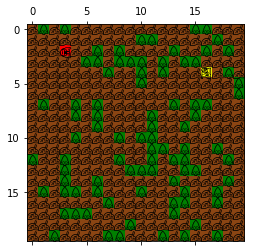

In [38]:
g_rand.reset_position()
visualize_grid(g_rand)

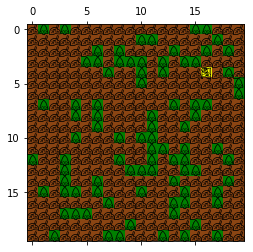

In [47]:
scores = [] 
for i in range(100000):
    g_rand.reset_position()
    score = simulate_policy(g_rand, policy_type="epsilon-greedy", model=qlearning_model, policy=eps_greedy_policy, 
                    run_to_completion=False, num_steps=50, visualize=False)
    scores.append(score)
visualize_grid(g_rand)


In [98]:
value_model = ValueIterationModel(g_rand, maxIter=50)
value_model.value_update()

8.655125
9.990231696540702
9.224793724946128
8.191806516421877
7.3882087805901175
7.465897355991812
7.194845313216948
7.316508277762971
6.75353078590836
5.975647824028382
5.930152066893061
7.075204690209112
6.2188224962043925
5.751332840063618
5.010671218287152
5.3646286911950725
6.290729410985218
5.634500976427084
5.444208528348568
4.776762688724858
4.76253879136701
4.801329935315728
4.426748242535474
4.602361440298907
4.536706030293615
4.967727006651856
4.109144131684825
4.437633665183149
4.5902192308334975
4.549251841683514
3.815191034605185
4.099732325690674
4.7678293755865155
4.702653636688112
4.399230341049943
4.528366162981406
4.7373643689351255
3.865684725613093
4.647415922981899
4.236529658473849
4.47126401573022
4.211962245359871
4.191982356943001
3.837194965731925
4.601995620253014
4.193075889804234
3.7976311065553503
3.7641887898105253
3.7348222278727334
3.706874725806358


False

TypeError: 'NoneType' object is not subscriptable

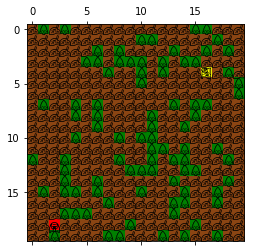

In [104]:
g_rand.reset_position()
policy_score_learned = simulate_policy(g_rand, policy_type="fixed", model=value_model, policy=FixedPolicy(g_rand), run_to_completion=True)

Text(0.5, 0, 'Batch number (1000 episodes per batch)')

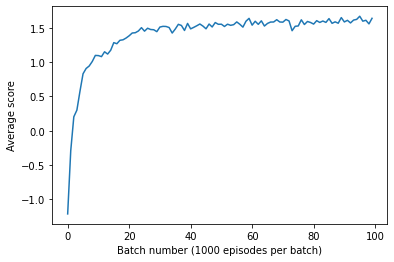

In [ ]:
# plt.scatter(range(len(scores)), scores, 0.5)
avg_scores = np.mean(np.array(scores).reshape(-1, 1000), axis=1)
plt.plot(range(len(avg_scores)), avg_scores)
plt.ylabel("Average score")
plt.xlabel("Batch number (1000 episodes per batch)")

In [ ]:
# plt.imshow(a, cmap='hot', interpolation='nearest')
# plt.show()
qlearning_model.Q.shape

(20, 20, 4, 3, 3, 3, 6)

In [ ]:
learned_policy = FixedPolicy(qlearning_model.extract_policy(), g_rand,qlearning_model)
print(learned_policy.policy)

[[[[[[5 5 4]
     [4 0 0]
     [0 0 0]]

    [[1 0 0]
     [0 0 0]
     [0 0 0]]

    [[0 1 0]
     [0 0 0]
     [0 0 0]]]


   [[[1 0 1]
     [1 1 0]
     [1 0 0]]

    [[0 0 0]
     [1 0 0]
     [0 0 0]]

    [[0 5 0]
     [0 0 0]
     [0 0 0]]]


   [[[1 1 0]
     [0 0 0]
     [0 0 0]]

    [[1 0 0]
     [1 0 0]
     [0 0 0]]

    [[0 1 0]
     [0 0 0]
     [0 0 0]]]


   [[[1 1 0]
     [0 0 0]
     [0 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[0 4 0]
     [0 0 0]
     [0 0 0]]]]



  [[[[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]]]

In [ ]:
# reset agent position in existing grid
g_rand.reset_position()

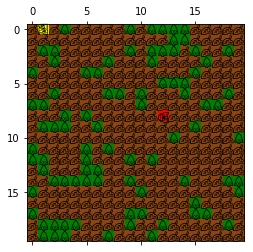

In [ ]:
visualize_grid(g_rand)

33


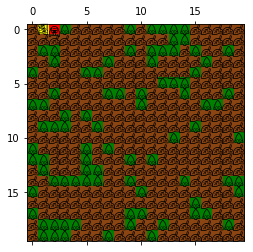

In [ ]:
policy_score_learned = simulate_policy(g_rand, policy_type="fixed", model=None, policy=learned_policy, run_to_completion=True)

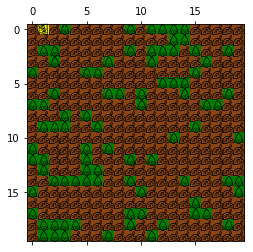

In [ ]:
visualize_grid(g_rand)

In [ ]:
print(policy_score_learned)

0.9201295511778791


27


KeyboardInterrupt: 

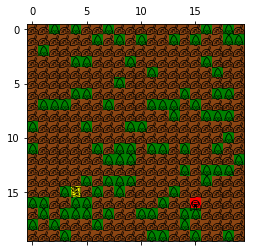

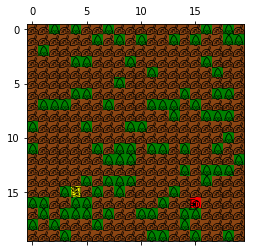

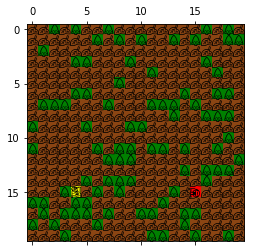

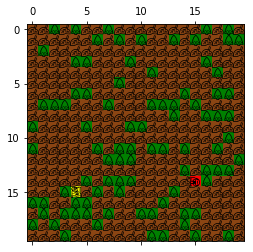

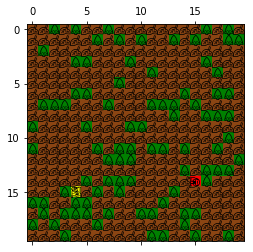

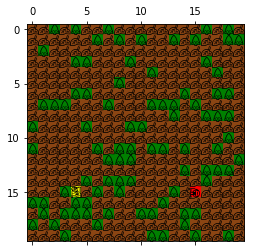

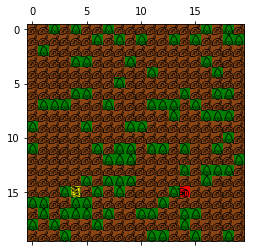

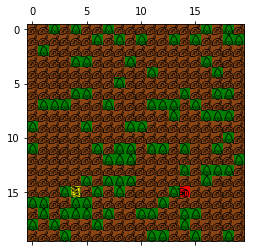

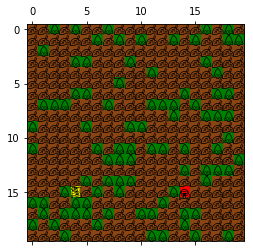

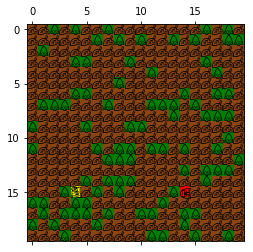

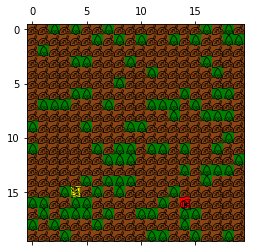

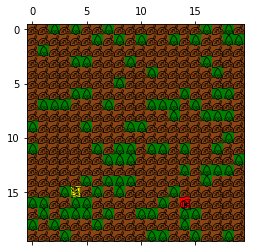

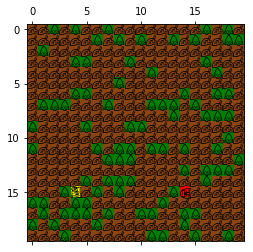

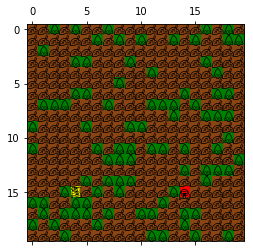

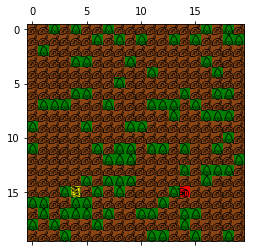

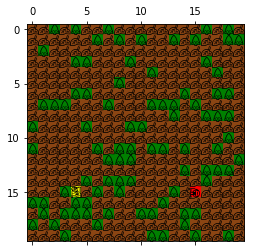

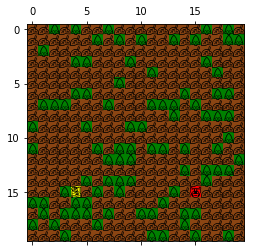

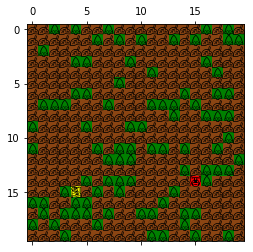

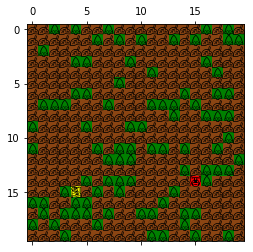

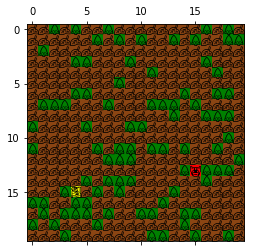

In [ ]:
g_rand1 = Gridworld(gridworld_length=20, gridworld_width=20, num_obstacles=100,
                 collisionReward= -1, destinationReward= 5, defaultReward= 0, outOfBoundsReward = -1, 
                 failChance= 0.1, gamma= 0.95)
policy_score_learned = simulate_policy(g_rand1, policy_type="fixed", model=None, policy=learned_policy, run_to_completion=False, num_steps=50,)